## Project 4 (Pract) - Abalone Case Study

**Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

### Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Checking Info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
#if has null value, fill those by imputation
df.isnull().sum().sum()

0

#### NO NULL VALUES, so let's proceed ahead.

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape #gives nos of rows and columns

(4177, 9)

##### The dataset had 9 columns and 4177 rows.

In [7]:
df.columns #name of columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df["Rings"].unique() #This is the target column, which predicts the age of the abalone

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

## Label encoding

In [9]:
df['Sex']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

This column is in strings format, so we need to make it in a numerical data by using the label encoder.

In [10]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Visualization of the data

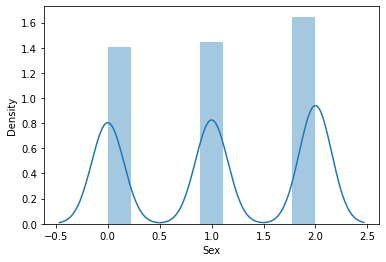

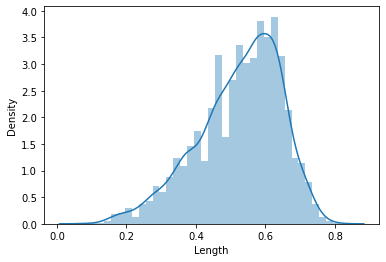

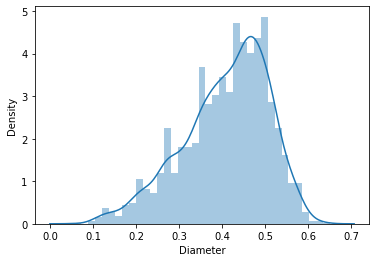

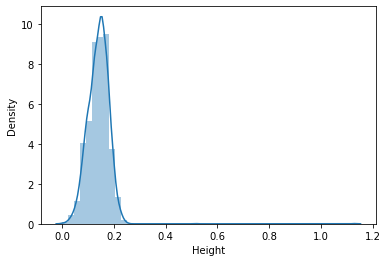

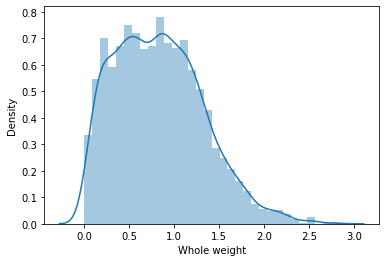

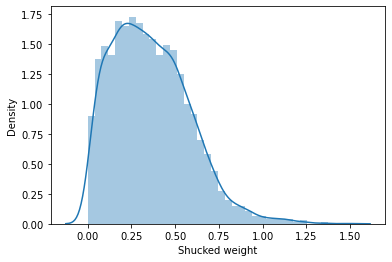

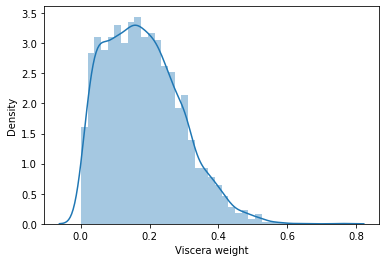

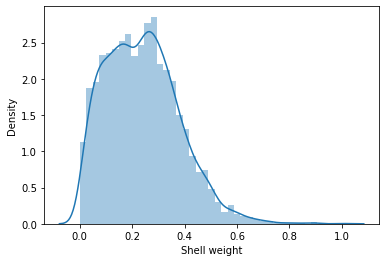

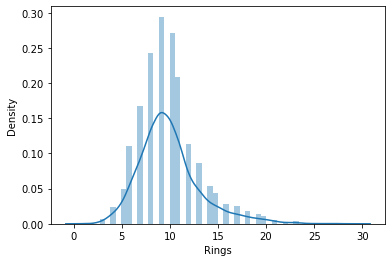

In [11]:
#for checking all columns:

for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Rings', ylabel='Count'>

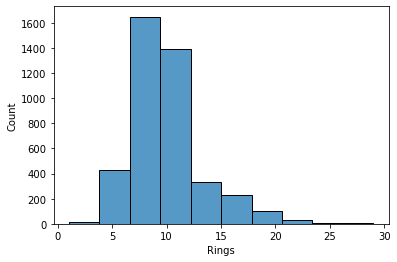

In [12]:
sns.histplot(df["Rings"],bins=10)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

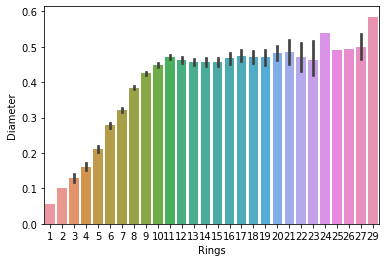

In [13]:
#using Seaborn, we plot different graphs to see corelation.

sns.barplot(data=df,x='Rings',y='Diameter')

<AxesSubplot:xlabel='Rings', ylabel='Length'>

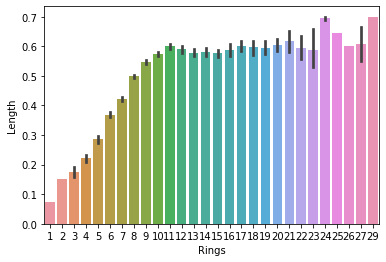

In [14]:
sns.barplot(data=df,y='Length',x='Rings')

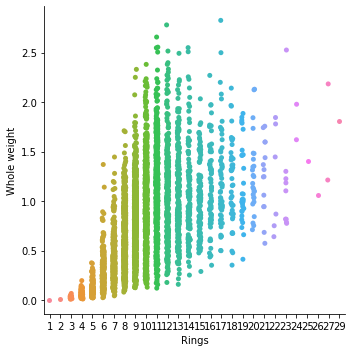

In [15]:
sns.catplot(x='Rings',y='Whole weight', data = df)

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

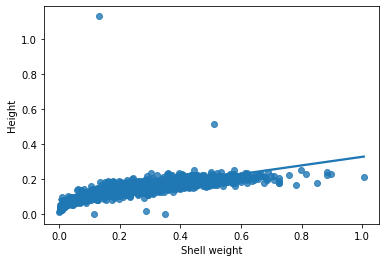

In [16]:
sns.regplot(x="Shell weight",y="Height",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

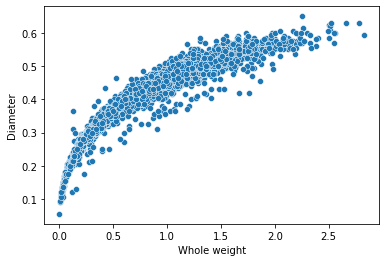

In [17]:
sns.scatterplot(x="Whole weight",y="Diameter",data=df)

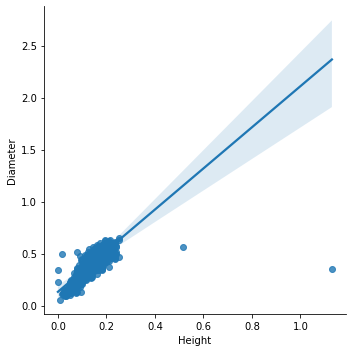

In [18]:
sns.lmplot(x="Height",y="Diameter",data=df)

## EXPLATORY DATA ANALYSIS(EDA)

In [51]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


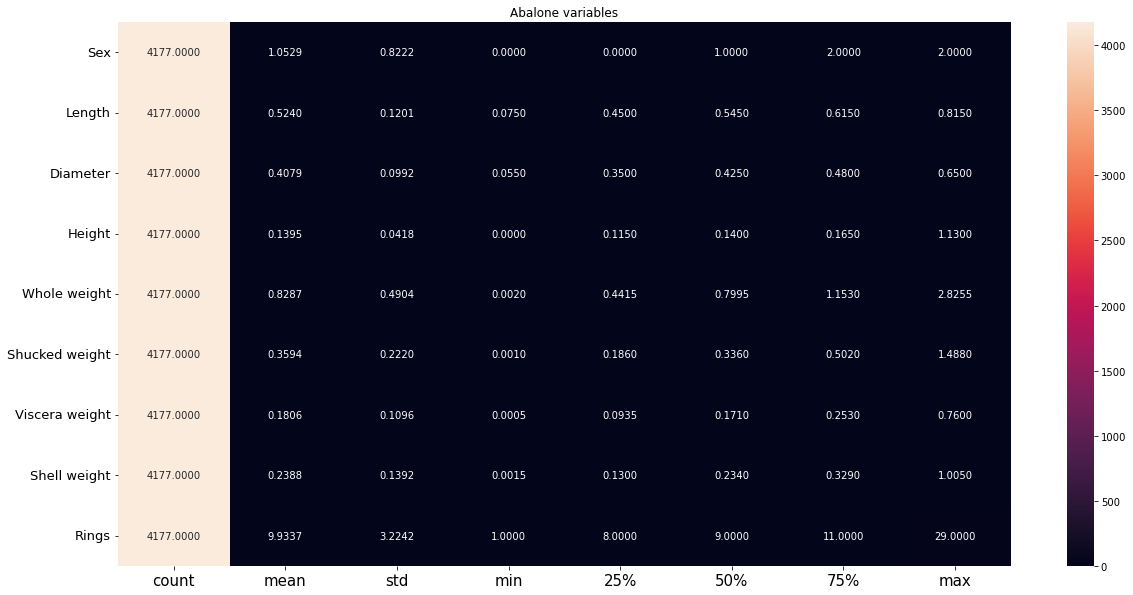

In [52]:
#plotting heat map for better understanding:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe().transpose(), annot=True,fmt='0.4f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Abalone variables")
plt.show()

### Describing the dataset:
The data looks pretty normal, but high gap between 75th percentile and max in "Rings". Means few outliers may be present.

## Check Correlation of columns with the target:

In [53]:
df.corr() #correlation 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

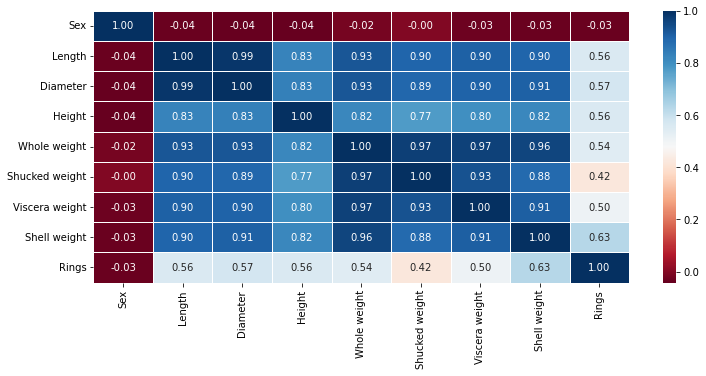

In [54]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='RdBu',annot=True,linewidth=0.5,fmt='0.2f')

In [55]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

In above graph, the "Shucked weight" column is showing the least corelation with the target 'Rings'
Hence, we can consider dropping this column.

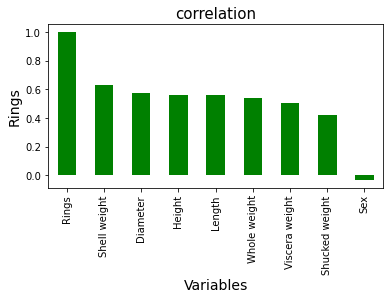

In [56]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(6,3))
df.corr()["Rings"].sort_values(ascending=False).plot(kind='bar', color='g')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Rings",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

#### Few columns seem to show equal correlation, hence we use the Variance Inflation Factor technique to remove few correlated columns in later step.

## Using VIF to remove highly correlated column:

In [57]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [58]:
x.shape,y.shape, x.shape[1]

((4177, 8), (4177,), 8)

In [59]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [60]:
vif_calc()

   VIF Factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


In [61]:
df.drop(["Shucked weight","Length"],axis=1,inplace=True) 
#Between Length,Diameter,whole weight and sucked weight,dropping "Shucked weight" and "Length" as it showed least corelation in the heatmap"
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


## Check Skewness
Threshold=+/-0.5

In [62]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [63]:
df.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
dtype: float64

In [64]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x)
x1

array([[ 1.12707158, -0.54986033, -1.12451192, -0.57676568, -0.69328289,
        -0.587809  ],
       [ 1.12707158, -1.38733299, -1.26439579, -1.35176054, -1.33295268,
        -1.33241968],
       [-1.30793479,  0.00853714, -0.06482301, -0.19809927, -0.25513514,
        -0.09826193],
       ...,
       [ 1.12707158,  0.64519089,  1.56508168,  0.77794363,  1.01560749,
         0.59839786],
       [-1.30793479,  0.76992788,  0.30708344,  0.63387374,  0.81518436,
         0.51914542],
       [ 1.12707158,  1.72628889,  1.34794324,  1.93732306,  1.61134422,
         1.65848824]])

In [65]:
#check skewness removed?
pd.DataFrame(x1).skew().sort_values(ascending=False)

4    0.039780
5    0.023390
3   -0.003980
1   -0.065977
2   -0.115483
0   -0.176442
dtype: float64

In [66]:
type(x1)

numpy.ndarray

In [67]:
x=pd.DataFrame(x1, columns=x.columns)
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.127072,-0.549860,-1.124512,-0.576766,-0.693283,-0.587809
1,1.127072,-1.387333,-1.264396,-1.351761,-1.332953,-1.332420
2,-1.307935,0.008537,-0.064823,-0.198099,-0.255135,-0.098262
3,1.127072,-0.549860,-0.320227,-0.571893,-0.547782,-0.544931
4,-0.009459,-1.459659,-1.549424,-1.413146,-1.451759,-1.485528
...,...,...,...,...,...,...
4172,-1.307935,0.345636,0.666117,0.241948,0.639623,0.193008
4173,1.127072,0.230611,-0.064823,0.395706,0.433568,0.275215
4174,1.127072,0.645191,1.565082,0.777944,1.015607,0.598398
4175,-1.307935,0.769928,0.307083,0.633874,0.815184,0.519145


In [68]:
type(x)

pandas.core.frame.DataFrame

In [69]:
x.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Height           -0.115483
Sex              -0.176442
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

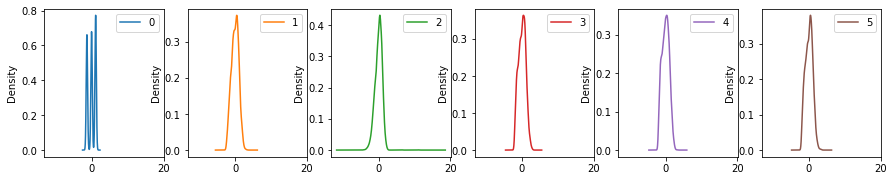

In [70]:
pd.DataFrame(x1).plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

### Skewness is removed

## Checking Outliers:

Sex                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Diameter          AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Height             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Whole weight      AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Viscera weight    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Shell weight         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Rings             AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

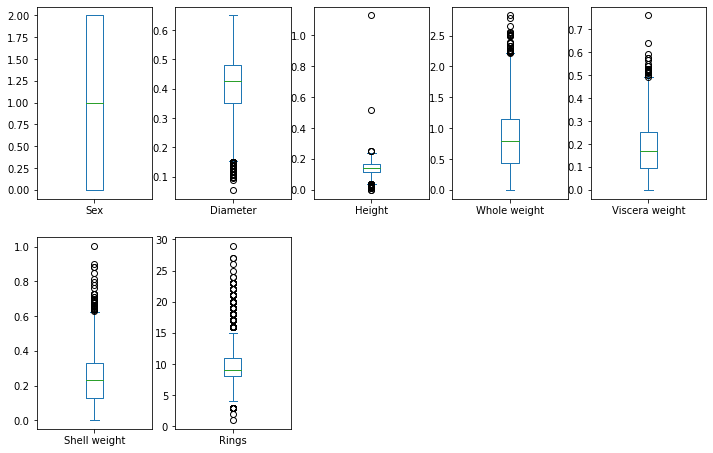

In [71]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))

Here outliers may be present in all columns mostly. so we need to remove those.

### Removing Outliers

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.head()


,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,1.151980,0.432149,1.064424,0.641898,0.726212,0.638217,1.571544
1,1.151980,1.439929,1.183978,1.230277,1.205221,1.212987,0.910013
2,1.280690,0.122130,0.107991,0.309469,0.356690,0.207139,0.289624
3,1.151980,0.432149,0.347099,0.637819,0.607600,0.602294,0.020571
4,0.064355,1.540707,1.423087,1.272086,1.287337,1.320757,0.910013


In [73]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [74]:
z.iloc[72,6], z.iloc[4145][5]

(3.12251641377204, 3.0043906996440928)

In [75]:
df1=df[(z<3).all(axis=1)]
df1

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [76]:
print('Old_DF:',df.shape)
print('New_DF:',df1.shape)
print('total dropped rows:',df.shape[0]-df1.shape[0])

Old_DF: (4177, 7)
New_DF: (4050, 7)
total dropped rows: 127


### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [78]:
loss_percent=(4177-4050)/4177*100
print(loss_percent,'%')

3.040459660043093 %


## Scaling The Data using Standard Scaler
#### Since the data is in binary we will use the logistic regression model

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ln=LinearRegression()
x1=sc.fit_transform(x)
x1
x=x1
x

array([[ 1.12707158, -0.54986033, -1.12451192, -0.57676568, -0.69328289,
        -0.587809  ],
       [ 1.12707158, -1.38733299, -1.26439579, -1.35176054, -1.33295268,
        -1.33241968],
       [-1.30793479,  0.00853714, -0.06482301, -0.19809927, -0.25513514,
        -0.09826193],
       ...,
       [ 1.12707158,  0.64519089,  1.56508168,  0.77794363,  1.01560749,
         0.59839786],
       [-1.30793479,  0.76992788,  0.30708344,  0.63387374,  0.81518436,
         0.51914542],
       [ 1.12707158,  1.72628889,  1.34794324,  1.93732306,  1.61134422,
         1.65848824]])

In [81]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

# Training of the data

### Finding the best random fit

In [107]:
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived
ln=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ln.fit(x_train,y_train)
    ln.score(x_train,y_train)
    pred_test=ln.predict(x_test)
    pred_train=ln.predict(x_train)
    R2_score=(r2_score(y_test,pred_test)*100)
    if R2_score>MaxAcu:
        MaxAcu=R2_score
        MaxRS=i
print("Best Accuracy is",MaxAcu, "on Random state",MaxRS)  

Best Accuracy is 52.78413818782964 on Random state 31


#### At random state 31 the best accuracy score is: 53%

Moving on with the train test split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=83)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((2798, 6), (1379, 6), (2798,), (1379,))

### Linear regression

In [109]:
ln.fit(x_train,y_train)
ln.score(x_train,y_train)
ln.coef_
ln.intercept_
pred_test=ln.predict(x_test)
pred_train=ln.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1.6439729767308093
Mean squared error: 5.029857575532823
Root mean squared error: 2.242734397010226
R2 Score= 47.55173146596804


### Random Forest Regression

In [110]:
#from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor() 
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1.6316171138506164
Mean squared error: 5.031784771573604
Root mean squared error: 2.2431640090670153
R2 Score= 47.53163584816043


### Support vector Regression

In [111]:
svc=SVC()
svc.fit(x_train,y_train)
pred_test=svc.predict(x_test)
pred_train=svc.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1.7374909354604786
Mean squared error: 7.269035532994923
Root mean squared error: 2.696114896104193
R2 Score= 24.202957659779965


### Ride regression

In [112]:
from sklearn.linear_model import Ridge
r=Ridge() 
r.fit(x_train,y_train)
pred_test=r.predict(x_test)
pred_train=r.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1.6437304876593055
Mean squared error: 5.027109718362335
Root mean squared error: 2.2421217001675746
R2 Score= 47.58038443448787


#### Here Ridge  Regression model gives the best R2 Score= 48%

## Cross Validation Method

In [114]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print("Cross validadtion score of Linear regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest Regression is", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validadtion score of SVC is", scr.mean())

scr=cross_val_score(r,x,y,cv=5)
print("Cross validadtion score of Ridge Regression is", scr.mean())

Cross validadtion score of Linear regression Model is 0.349485789942801
Cross validadtion score of Random Forest Regression is 0.3535160883713802
Cross validadtion score of SVC is 0.2573629773944933
Cross validadtion score of Ridge Regression is 0.3493597116879542


#### Here also, the best cross validation score is from the Ridge which is 48% which is nearby to the R2 score of 35%. SO the Ridge Regression is the best algorithm for training the model

<function matplotlib.pyplot.show(close=None, block=None)>

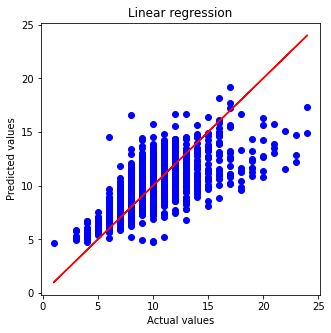

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual values",fontsize=10)
plt.ylabel("Predicted values",fontsize=10)
plt.title("Linear regression")
plt.show

## Saving the model

In [116]:
import joblib

joblib.dump(rf,'Abalone.obj') ##save the model as an object file
Abalone_from_joblib=joblib.load('Abalone.obj') #load the model from the file

#use the loaded model to make predictions
Abalone_from_joblib.predict(x_test)

array([ 8.53,  9.43,  7.61, ..., 13.49,  7.01,  8.65])

# END